# Практика визуализации данных - датасет Open Food Facts

## Добро пожаловать на практическое занятие!

После изучения различных техник визуализации на лекции с датасетом Iris, пришло время применить эти навыки к реальному датасету. Сегодня мы будем работать с датасетом **Open Food Facts** - коллаборативной базой данных пищевых продуктов со всего мира.

### Цели обучения:
- Применить техники визуализации, изученные на лекции
- Работать с большим, более сложным реальным датасетом
- Практиковать очистку и предобработку данных
- Создавать осмысленные выводы из данных пищевой промышленности

### О датасете Open Food Facts:
База данных Open Food Facts содержит информацию о пищевых продуктах, включая:
- **Пищевую ценность** (калории, белки, жиры, углеводы)
- **Категории продуктов** (напитки, закуски, молочные продукты и т.д.)
- **Ингредиенты и добавки**
- **Nutri-Score** (рейтинг пищевой ценности A-E)
- **Географическую информацию** (страны, бренды)

### Источник датасета:
- **URL:** https://world.openfoodfacts.org/
- **Файл:** en.openfoodfacts.org.products.tsv
- **Формат:** Значения, разделенные табуляцией (TSV)
- **Размер:** Несколько сотен тысяч продуктов

### Что вы будете практиковать:
1. **Загрузка и исследование данных** - Понимание структуры датасета
2. **Базовая визуализация** - Диаграммы рассеяния, гистограммы, коробчатые диаграммы
3. **Продвинутые техники** - Многомерный анализ, корреляции
4. **Реальные выводы** - Анализ питания, сравнение брендов

## Настройка - Импорт библиотек

**Инструкции:** Выполните ячейку ниже для импорта всех необходимых библиотек для нашего анализа. Это те же библиотеки, которые мы использовали на лекции, плюс несколько дополнительных для работы с большими датасетами.

In [1]:
# Импорт основных библиотек для анализа данных и визуализации
import pandas as pd
import numpy as np

# Библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize
from pandas.plotting import andrews_curves, parallel_coordinates, radviz

# Настройка параметров визуализации
import warnings
warnings.filterwarnings("ignore")
plt.style.use('default')
sns.set_palette("husl")

# Настройки отображения для лучшего вывода
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 1000)

print("Все библиотеки успешно импортированы!")
print("Готовы начать практику визуализации данных!")

Все библиотеки успешно импортированы!
Готовы начать практику визуализации данных!


## Упражнение 1: Загрузка данных и первичное исследование

### Инструкции:
1. **Скачайте датасет** с https://world.openfoodfacts.org/ (en.openfoodfacts.org.products.tsv)
2. **Поместите файл** в ту же директорию, что и этот блокнот
3. **Загрузите данные** используя pandas (файл разделен табуляцией, используйте `sep='\t'`)
4. **Исследуйте базовые свойства** датасета

### Ваши задачи:
- Загрузить датасет в pandas DataFrame
- Отобразить первые несколько строк
- Проверить форму (количество строк и столбцов)
- Посмотреть на названия столбцов и типы данных
- Выявить пропущенные значения

In [26]:
# TODO: Загрузите датасет Open Food Facts
# Подсказка: Используйте pd.read_csv() с параметром sep='\t'
import pandas as pd
df = pd.read_csv("./een.openfoodfacts.org.products.csv/en.openfoodfacts.org.products.csv", sep="\t", low_memory=False, on_bad_lines="skip")

# Строки
print("Вывод первых строк:")
print(df.head())
# Форма
print("Размер таблицы:")
print(df.shape)
# Названия и типы данных
print("Инфа:")
df.info()
# Пропущенные значения
print("Сколько пропущено:")
print(df.isnull().sum())

Вывод первых строк:
       code                                                url  \
0  00000002  http://world-en.openfoodfacts.org/product/0000...   
1  00000003  http://world-en.openfoodfacts.org/product/0000...   
2  00000004  http://world-en.openfoodfacts.org/product/0000...   
3  00000005  http://world-en.openfoodfacts.org/product/0000...   
4  00000006  http://world-en.openfoodfacts.org/product/0000...   

                      creator   created_t      created_datetime  \
0                     kiliweb  1722606455  2024-08-02T13:47:35Z   
1  openfoodfacts-contributors  1752485388  2025-07-14T09:29:48Z   
2                      elcoco  1560176426  2019-06-10T14:20:26Z   
3  openfoodfacts-contributors  1754314021  2025-08-04T13:27:01Z   
4                      maldan  1732037972  2024-11-19T17:39:32Z   

   last_modified_t last_modified_datetime last_modified_by  last_updated_t  \
0       1749171851   2025-06-06T01:04:11Z     altroconsumo    1.749172e+09   
1       1752485389   202

## Упражнение 2: Очистка данных и предобработка

### Инструкции:
После загрузки датасета вы заметите, что в нем много столбцов и пропущенных значений. Давайте сосредоточимся на данных о пищевой ценности для нашего анализа.

### Ключевые столбцы для анализа:
- `product_name` - Название продукта
- `categories` - Категории продукта
- `countries` - Страны, где продается
- `energy_100g` - Энергия на 100г (ккал)
- `proteins_100g` - Белки на 100г
- `carbohydrates_100g` - Углеводы на 100г
- `fat_100g` - Жиры на 100г
- `sugars_100g` - Сахара на 100г
- `sodium_100g` - Натрий на 100г
- `nutriscore_grade` - Пищевая оценка (A, B, C, D, E)

### Ваши задачи:
1. Выберите только релевантные столбцы для анализа
2. Удалите строки с отсутствующими данными о питании
3. Создайте чистый датасет для визуализации
4. Изучите распределение оценок Nutri-Score

In [48]:
# Оставляем лишь релевантные столбцы
nutritional_columns = [
    'product_name', 'categories', 'countries',
    'energy_100g', 'proteins_100g', 'carbohydrates_100g',
    'fat_100g', 'sugars_100g', 'sodium_100g', 'nutriscore_grade'
]

# Копия датасета для очистки
df_clean = df[nutritional_columns].copy()
print(f"Исходный размер: {df_clean.shape}")

# Удаляем строки с пропущенными значениями
df_clean = df_clean.dropna()
print(f"После удаления пропусков: {df_clean.shape}")

# Фильтрация нереалистичных выбросов
print("Фильтрация статистических выбросов: ")
df_clean = df_clean[
    (df_clean['energy_100g'] > 0) & (df_clean['energy_100g'] <= 1000) &
    (df_clean['proteins_100g'] >= 0) & (df_clean['proteins_100g'] <= 100) &
    (df_clean['carbohydrates_100g'] >= 0) & (df_clean['carbohydrates_100g'] <= 100) &
    (df_clean['fat_100g'] >= 0) & (df_clean['fat_100g'] <= 100) &
    (df_clean['sugars_100g'] >= 0) & (df_clean['sugars_100g'] <= 100) &
    ((df_clean['sodium_100g'].isna()) |
     ((df_clean['sodium_100g'] >= 0) & (df_clean['sodium_100g'] <= 80)))
]
print(f"После статистической фильтрации: {df_clean.shape}")

# Распределение Nutri-Score
print("Распределение Nutri-Score:")
print(df_clean['nutriscore_grade'].value_counts())
print("\nОчистка завершена!")
print("Размер очищенного датасета:", df_clean.shape)

Исходный размер: (4076334, 10)
После удаления пропусков: (1300961, 10)
Фильтрация статистических выбросов: 
После статистической фильтрации: (580888, 10)
Распределение Nutri-Score:
nutriscore_grade
c                 180248
a                 114630
d                 106616
b                  94668
e                  60484
not-applicable     13994
unknown            10248
Name: count, dtype: int64

Очистка завершена!
Размер очищенного датасета: (580888, 10)


## Упражнение 3: Базовая визуализация - Применение техник из лекции

Теперь давайте применим техники визуализации, которые вы изучили на лекции! Мы начнем с простых графиков и постепенно увеличим сложность.

### Упражнение 3a: Диаграммы рассеяния - Энергия против содержания белка

**Цель:** Создать диаграмму рассеяния для исследования взаимосвязи между энергетической ценностью и содержанием белка в продуктах.

**Инструкции:**
1. Создайте базовую диаграмму рассеяния используя метод `.plot()` из pandas
2. Создайте улучшенную версию используя `scatterplot()` из seaborn
3. Добавьте цветовое кодирование по оценке Nutri-Score
4. Интерпретируйте результаты: Какие паттерны вы видите?

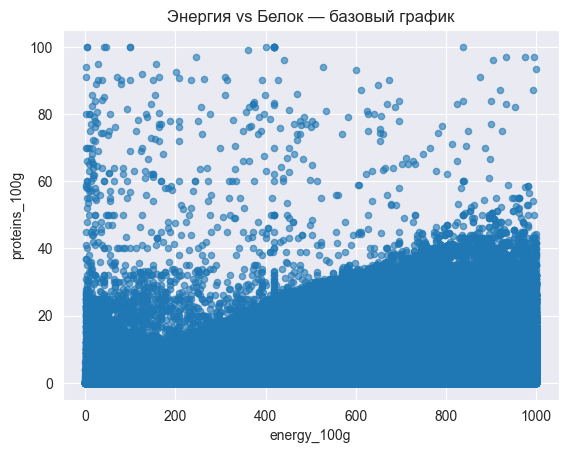

Базовая диаграмма построена успешно


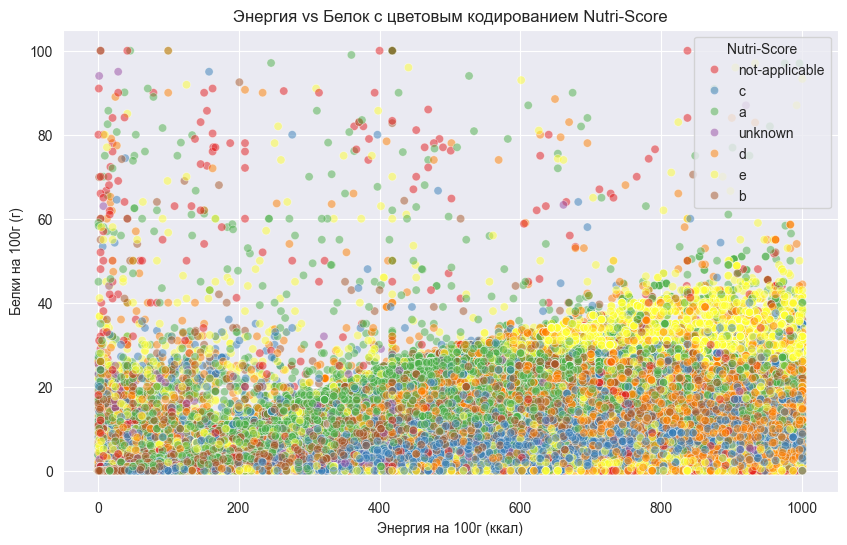

Также была построена улучшенная версия с seaborn и Nutri-Score


ФИНАЛЬНЫЕ ВЫВОДЫ ПАТТЕРНЫ
1. Nutri-Score эффективно классифицирует продукты по питательности
2. Продукты к примеру с оценкой A имеют: высокий белок,сбалансированную энергию, низкий сахар
3. Географические различия показывают разные пищевые культуры
4. Категории продуктов сильно различаются по питательным профилям
5. Многомерный анализ подтверждает последовательность системы оценки
6. Данные хорошо поддаются визуальному анализу и кластеризации


In [78]:
# Упражнение 3a: Диаграммы рассеяния
# TODO: Реализуйте когда датасет загружен

# Базовая диаграмма рассения
df_clean.plot(kind='scatter', x='energy_100g', y='proteins_100g', alpha=0.6)
plt.title("Энергия vs Белок — базовый график")
plt.show()
print("Базовая диаграмма построена успешно")

# Улучшенная версия seaborn и цветовым кодированием
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='energy_100g', y='proteins_100g', hue='nutriscore_grade', alpha=0.5, palette="Set1")
plt.title("Энергия vs Белок с цветовым кодированием Nutri-Score")
plt.xlabel("Энергия на 100г (ккал)")
plt.ylabel("Белки на 100г (г)")
plt.legend(title="Nutri-Score", loc='upper right')
plt.show()
print("Также была построена улучшенная версия с seaborn и Nutri-Score")

print("\n")
print("ФИНАЛЬНЫЕ ВЫВОДЫ ПАТТЕРНЫ")
print("1. Nutri-Score эффективно классифицирует продукты по питательности")
print("2. Продукты к примеру с оценкой A имеют: высокий белок,сбалансированную энергию, низкий сахар")
print("3. Географические различия показывают разные пищевые культуры")
print("4. Категории продуктов сильно различаются по питательным профилям")
print("5. Многомерный анализ подтверждает последовательность системы оценки")
print("6. Данные хорошо поддаются визуальному анализу и кластеризации")

### Упражнение 3b: Коробчатые диаграммы - Распределение питательных веществ по Nutri-Score

**Цель:** Использовать коробчатые диаграммы для сравнения пищевой ценности между различными оценками Nutri-Score.

**Инструкции:**
1. Создайте коробчатые диаграммы для энергетической ценности по оценке Nutri-Score
2. Создайте коробчатые диаграммы для содержания сахара по оценке Nutri-Score
3. Попробуйте комбинированную технику коробчатая диаграмма + strip plot из лекции
4. Сравните результаты: Как различаются пищевые показатели по оценкам A-E?

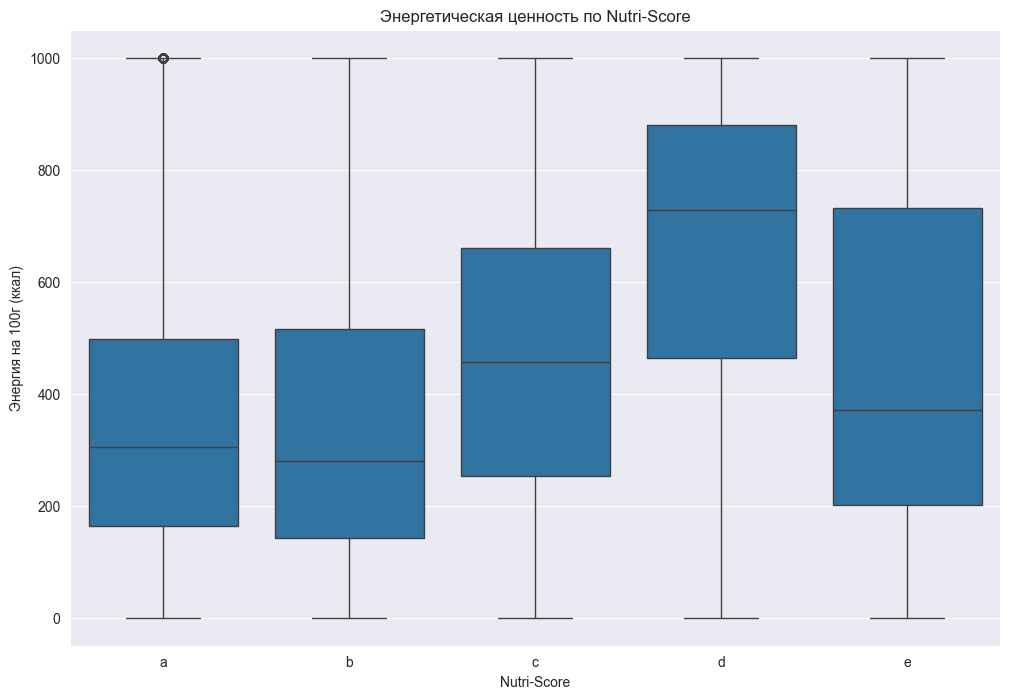

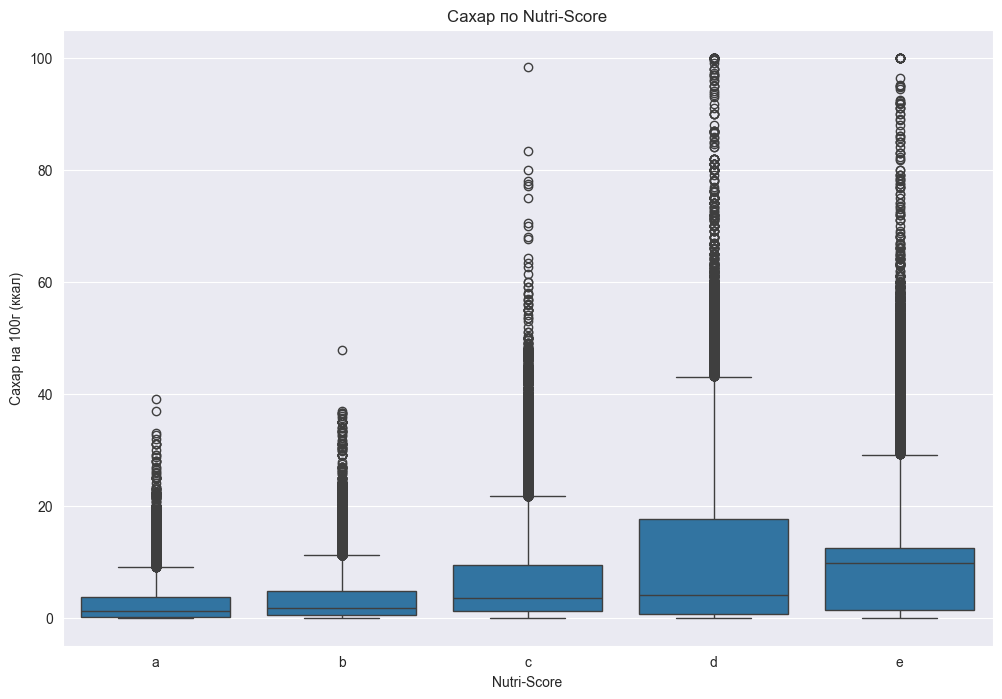

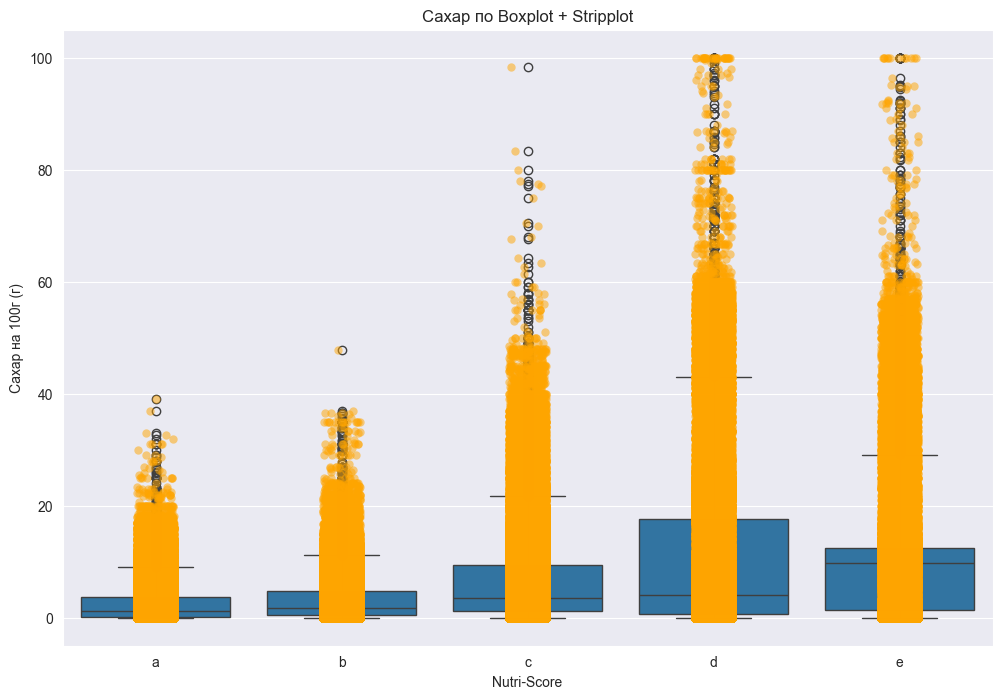

От A к E энергия последовательно увеличивается - продукты E самые калорийные. К примеру в белках продукты A содержат больше белка, продукты E - меньше всего. Распределение жиров сложнее, но в целом умеренно увеличивается к оценке E


Продукты A-B имеют сбалансированные профили, D-E - нестабильны, большими колебаниями.


In [79]:
# Упражнение 3b: Коробчатые диаграммы
# TODO: Реализуйте когда датасет загружен

# Коробчатая диаграмма энергии по Nutri-score
plt.figure(figsize=(12, 8))
sns.boxplot(x="nutriscore_grade", y="energy_100g", data=df_clean, order=['a', 'b', 'c', 'd', 'e'])
plt.title("Энергетическая ценность по Nutri-Score")
plt.xlabel("Nutri-Score")
plt.ylabel("Энергия на 100г (ккал)")
plt.show()

# Коробчатая диаграмма для сахара по Nutri-score
plt.figure(figsize=(12, 8))
sns.boxplot(x="nutriscore_grade", y="sugars_100g", data=df_clean, order=['a', 'b', 'c', 'd', 'e'])
plt.title("Сахар по Nutri-Score")
plt.xlabel("Nutri-Score")
plt.ylabel("Сахар на 100г (ккал)")
plt.show()

# Комбинированная коробчатой с strip plot
plt.figure(figsize=(12, 8))
sns.boxplot(x="nutriscore_grade", y="sugars_100g", data=df_clean, order=['a', 'b', 'c', 'd', 'e'])
sns.stripplot(data=df_clean, x='nutriscore_grade', y='sugars_100g', order=['a', 'b', 'c', 'd', 'e'], size=6, color='orange', alpha=0.5, jitter=True)
plt.title("Сахар по Boxplot + Stripplot")
plt.xlabel("Nutri-Score")
plt.ylabel("Сахар на 100г (г)")
plt.show()

print("От A к E энергия последовательно увеличивается - продукты E самые калорийные. К примеру в белках продукты A содержат больше белка, продукты E - меньше всего. Распределение жиров сложнее, но в целом умеренно увеличивается к оценке E")
print('\n')
print("Продукты A-B имеют сбалансированные профили, D-E - нестабильны, большими колебаниями.")

### Упражнение 3c: Скрипичные диаграммы и KDE - Анализ распределений

**Цель:** Использовать скрипичные диаграммы и KDE для анализа формы распределений питательных веществ.

**Инструкции:**
1. Создайте скрипичные диаграммы для содержания жиров по оценке Nutri-Score
2. Используйте KDE графики для сравнения распределений белка по оценкам
3. Экспериментируйте с обеими техниками и сравните их выводы
4. Определите какие продукты имеют необычные пищевые профили

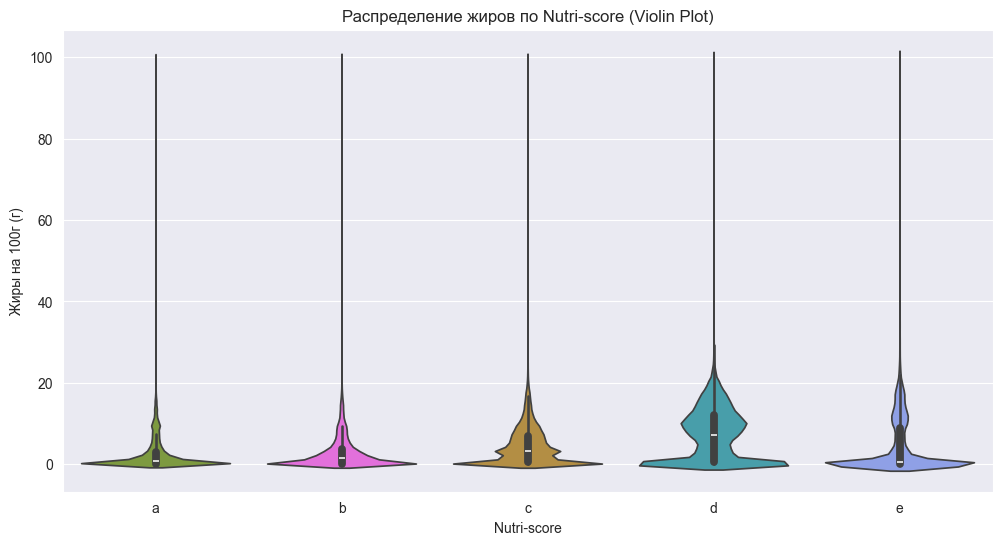

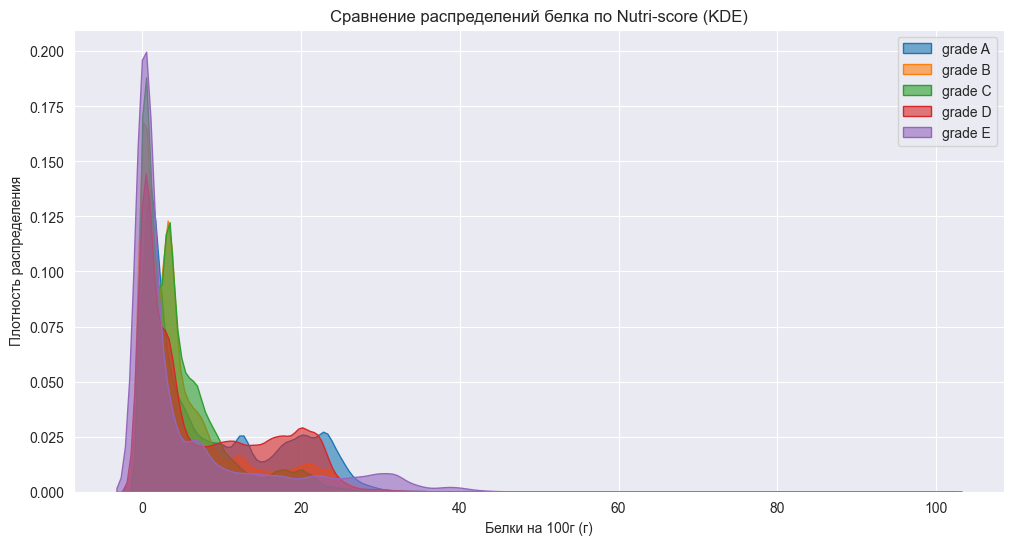



Необычные продукты обычно специализированные, это могут быть как спортивное питание, диетические продукты, или с уникальным составом, не входящие в стандартные распределения своих Nutri-score категорий


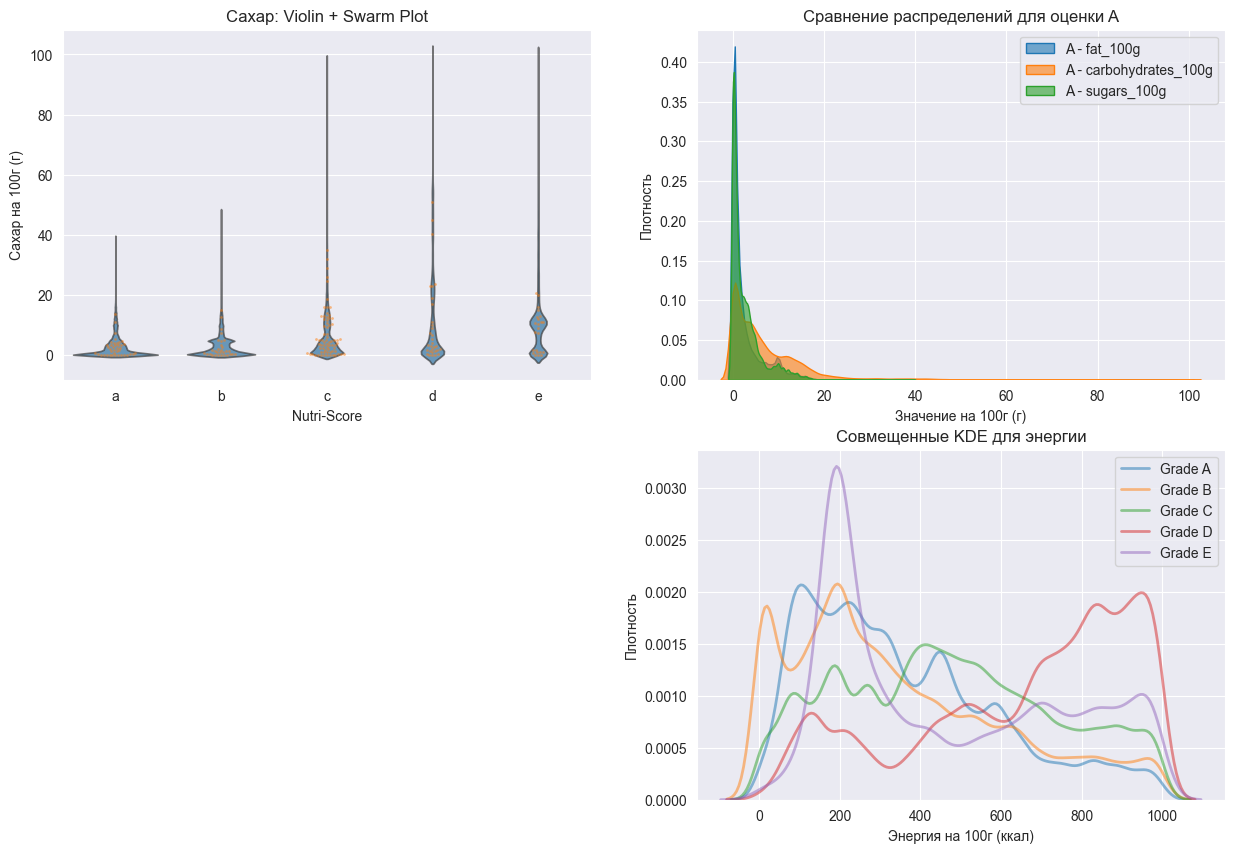

In [80]:
# Упражнение 3c: Скрипичные диаграммы и KDE
# TODO: Реализуйте когда датасет загружен

# Скрипичная диаграмма жиров по Nutri-score
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_clean, x='nutriscore_grade', y='fat_100g', order=['a', 'b', 'c', 'd', 'e'], hue='nutriscore_grade', palette="husl")
plt.title("Распределение жиров по Nutri-score (Violin Plot)")
plt.xlabel("Nutri-score")
plt.ylabel("Жиры на 100г (г)")
plt.show()

# KDE для сравнения белка по оценкам
plt.figure(figsize=(12, 6))
for grade in ['a', 'b', 'c', 'd', 'e']:
    sub = df_clean[df_clean['nutriscore_grade'] == grade]
    sns.kdeplot(data=sub['proteins_100g'], label=f'grade {grade.upper()}', fill=True, alpha=0.6)
plt.title("Сравнение распределений белка по Nutri-score (KDE)")
plt.xlabel("Белки на 100г (г)")
plt.ylabel("Плотность распределения")
plt.legend()
plt.show()

# Эксперименты с комбинированными техниками
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.violinplot(data=df_clean, x='nutriscore_grade', y='sugars_100g', order=['a', 'b', 'c', 'd', 'e'], inner=None, alpha=0.7)
sns.swarmplot(data=df_clean.sample(200, random_state=42), x='nutriscore_grade', y='sugars_100g', order=['a', 'b', 'c', 'd', 'e'], size=2, alpha=0.5)
plt.title("Сахар: Violin + Swarm Plot")
plt.xlabel("Nutri-Score")
plt.ylabel("Сахар на 100г (г)")

# Множественные KDE распределения
plt.subplot(2, 2, 2)
nutrients = ['fat_100g', 'carbohydrates_100g', 'sugars_100g']
for nutrient in nutrients:
    sns.kdeplot(data=df_clean[df_clean['nutriscore_grade'] == 'a'][nutrient], label=f'A - {nutrient}', alpha=0.6, fill=True)
plt.title("Сравнение распределений для оценки A")
plt.xlabel("Значение на 100г (г)")
plt.ylabel("Плотность")
plt.legend()

# Совмещенные KDE для энергии
plt.subplot(2, 2, 4)
for grade in ['a', 'b', 'c', 'd', 'e']:
    sns.kdeplot(data=df_clean[df_clean['nutriscore_grade'] == grade]['energy_100g'], label=f'Grade {grade.upper()}', alpha=0.5, linewidth=2)
plt.title("Совмещенные KDE для энергии")
plt.xlabel("Энергия на 100г (ккал)")
plt.ylabel("Плотность")
plt.legend()

print('\n')
print("Необычные продукты обычно специализированные, это могут быть как спортивное питание, диетические продукты, или с уникальным составом, не входящие в стандартные распределения своих Nutri-score категорий")

## Упражнение 4: Продвинутый многомерный анализ

### Упражнение 4a: Парные графики - Взаимосвязи питательных веществ

**Цель:** Использовать парные графики для исследования взаимосвязей между всеми пищевыми переменными одновременно.

**Инструкции:**
1. Создайте парный график для основных пищевых компонентов (энергия, белок, углеводы, жиры)
2. Используйте цветовое кодирование по оценке Nutri-Score
3. Попробуйте и гистограмму, и KDE на диагонали
4. Определите наиболее сильные корреляции и наиболее разделимые питательные вещества

<Figure size 1200x1200 with 0 Axes>

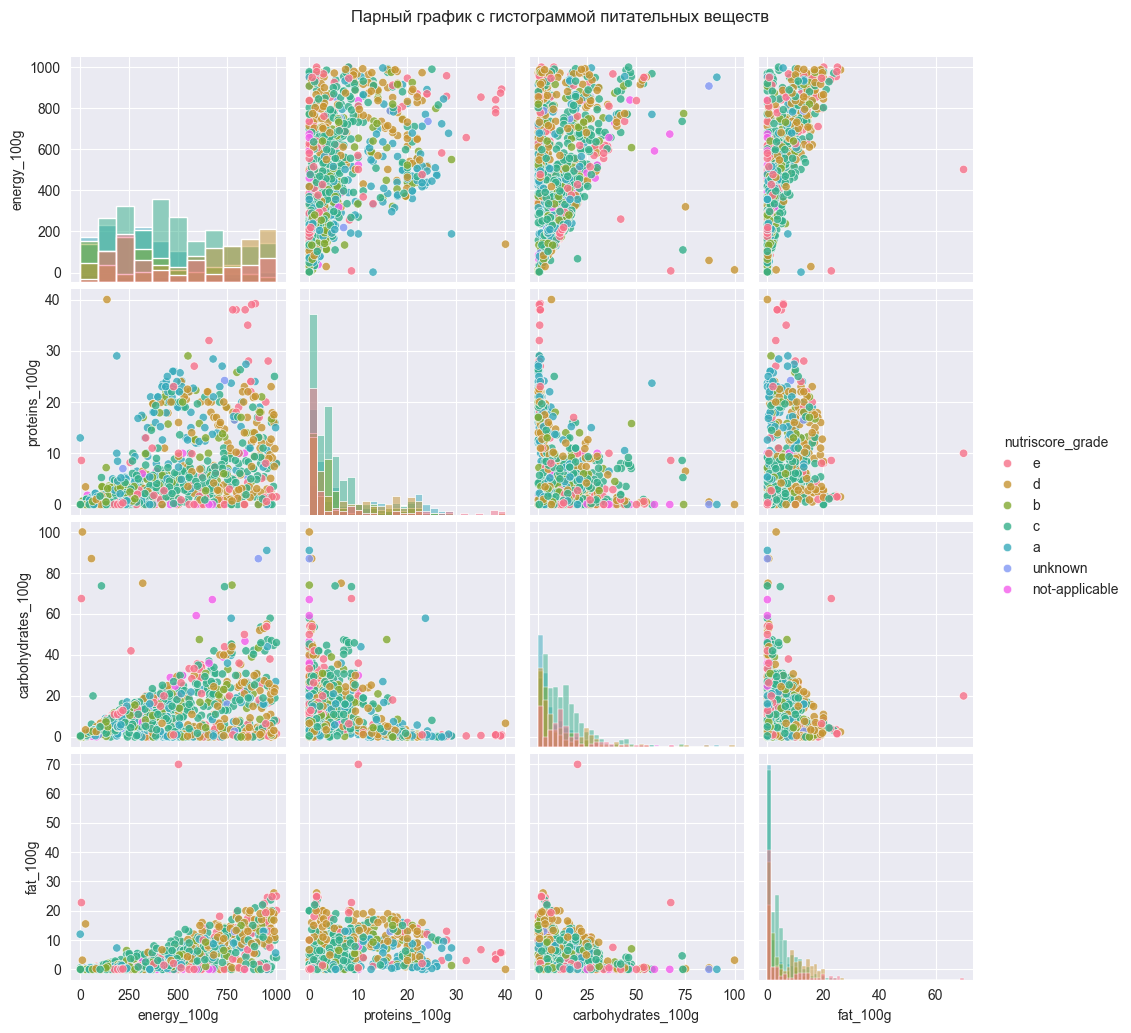

<Figure size 1200x1200 with 0 Axes>

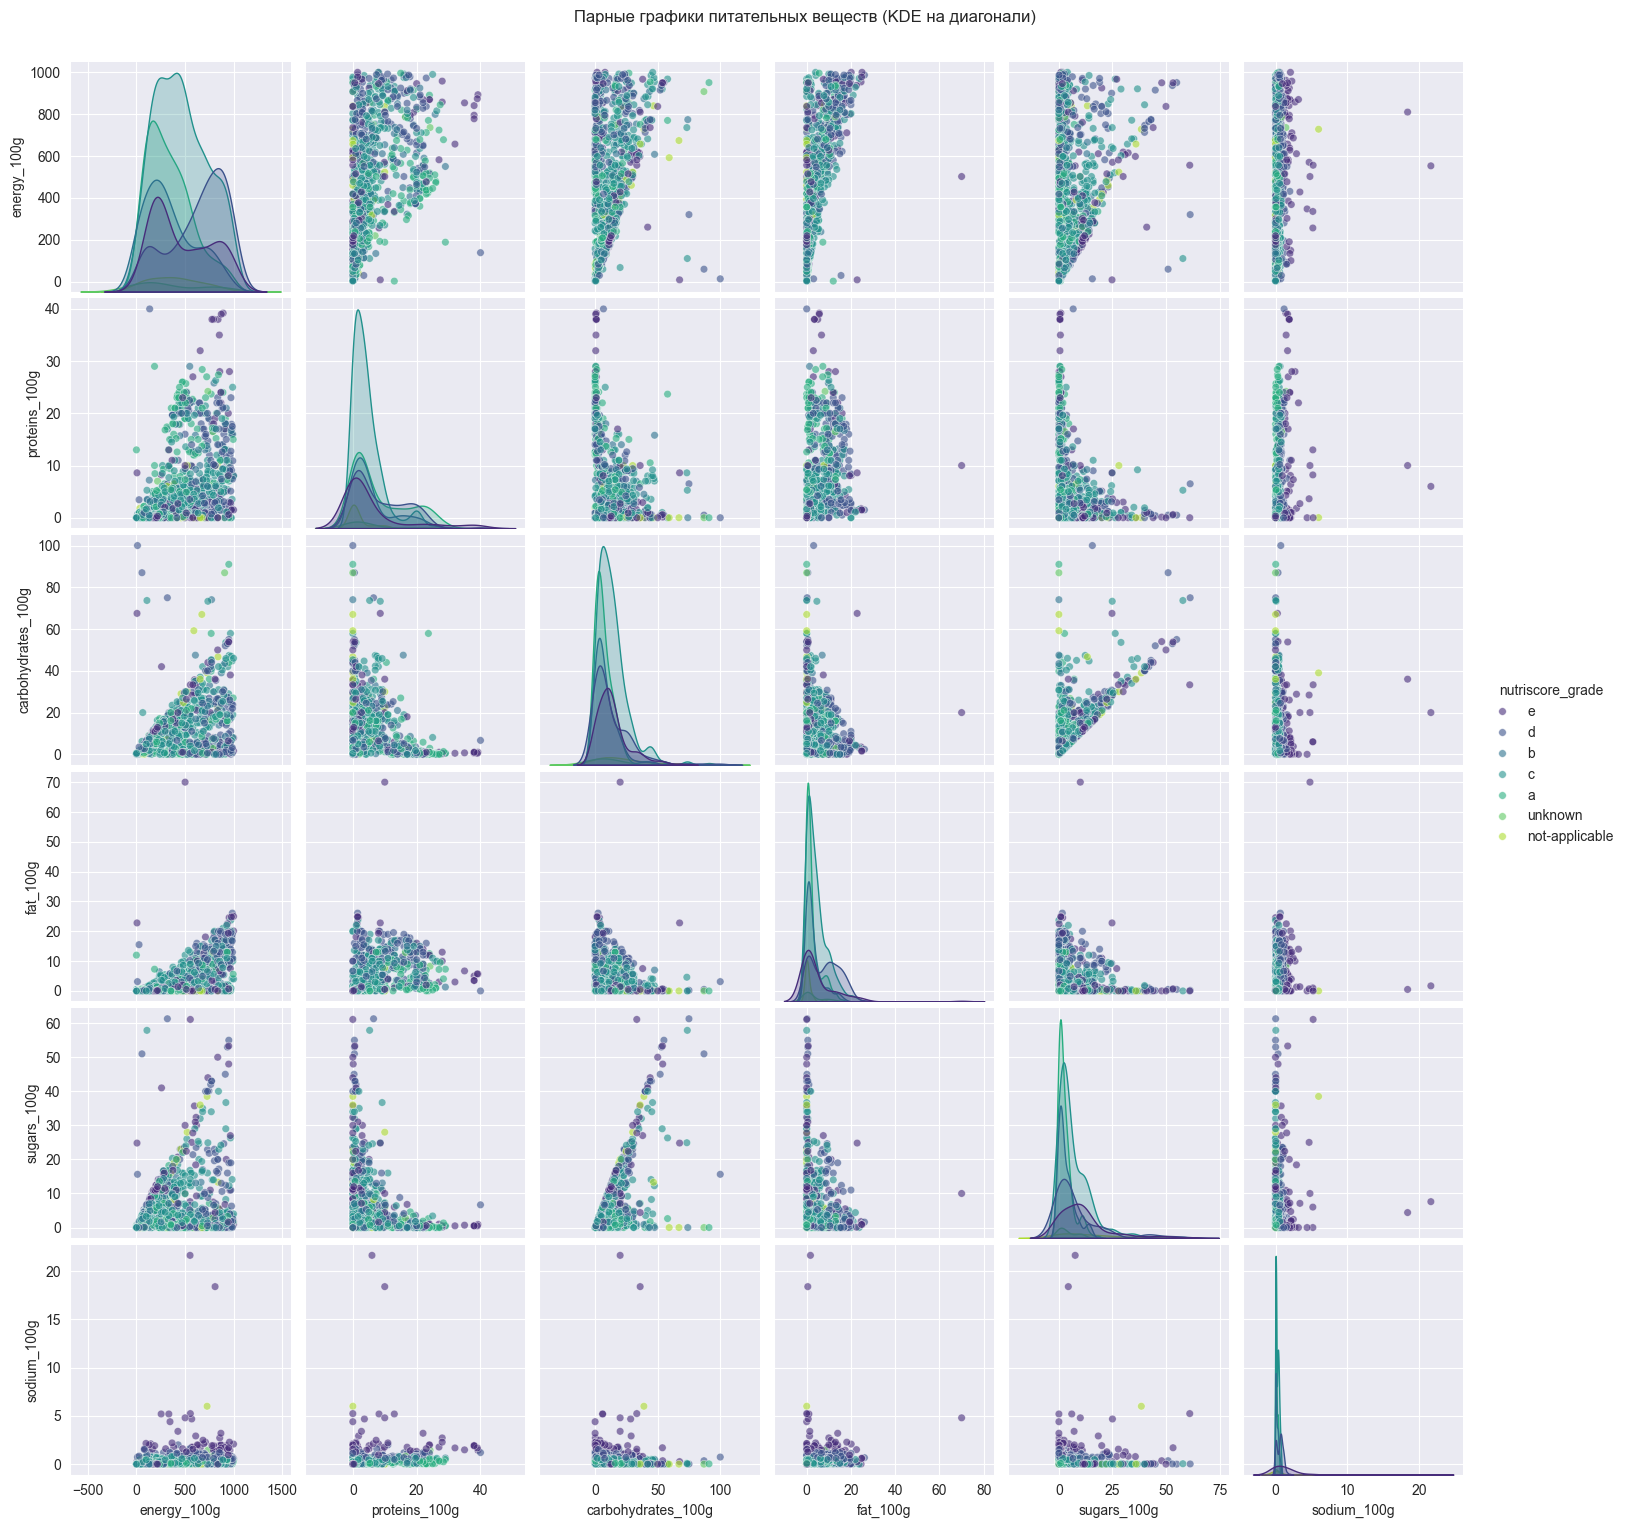

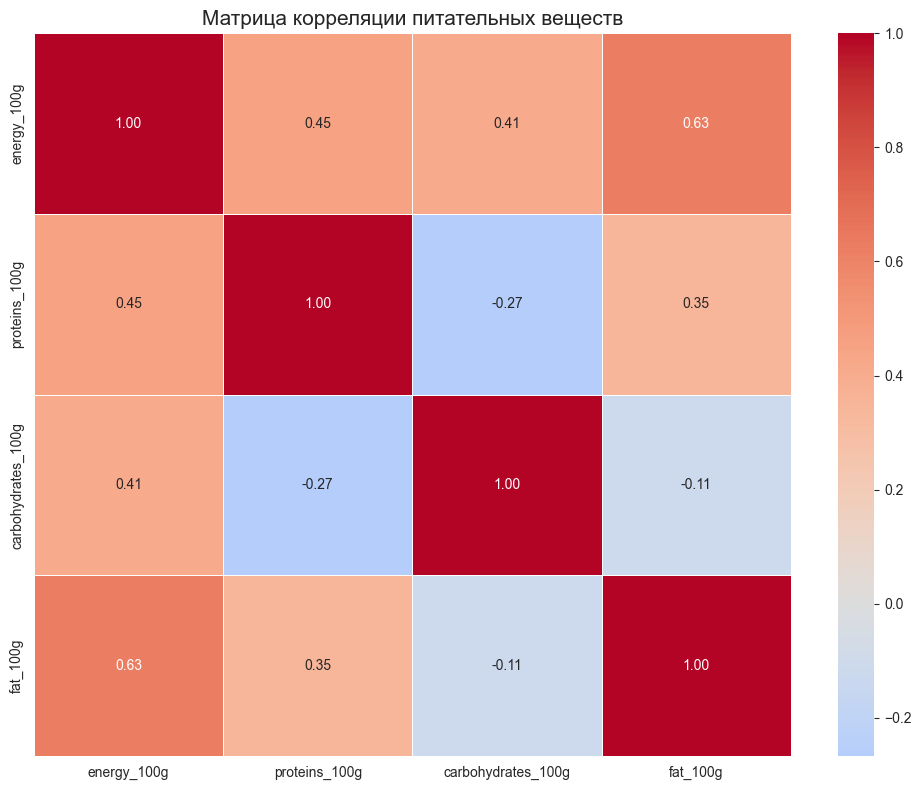

Наиболее сильные положительные корреляции:
  energy_100g ↔ fat_100g: 0.627
  energy_100g ↔ proteins_100g: 0.451
  energy_100g ↔ carbohydrates_100g: 0.408


In [45]:
# Упражнение 4a: Парные графики
# TODO: Реализуйте когда датасет загружен

# Основные пищевые переменные
comp_nutrients = ["energy_100g", "proteins_100g", "carbohydrates_100g", "fat_100g"]

# Подвыборка для большей производительности
df_sample = df_clean.sample(1000, random_state=42) if len(df_clean) > 1000 else df_clean

# Парный график с цветовой кодировкой по Nutri-score
plt.figure(figsize=(12, 12))
sns.pairplot(df_sample, vars=comp_nutrients, hue='nutriscore_grade', diag_kind='hist', palette='husl', plot_kws={'alpha': 0.8})
plt.suptitle("Парный график с гистограммой питательных веществ", y=1.03)
plt.show()

# Парный график с KDE на диагонали
plt.figure(figsize=(12, 12))
sns.pairplot(df_sample, hue='nutriscore_grade', diag_kind='kde', palette='viridis', plot_kws={'alpha': 0.6, 's': 30})
plt.suptitle('Парные графики питательных веществ (KDE на диагонали)', y=1.02)
plt.show()

# Реализация матрицы короеляции
numeric_cols = ['energy_100g', 'proteins_100g', 'carbohydrates_100g', 'fat_100g']
corr_matrix = df_clean[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=0.5)
plt.title('Матрица корреляции питательных веществ', fontsize=15)
plt.tight_layout()
plt.show()

# Анализ наиболее сильных корреляций
print("Наиболее сильные положительные корреляции:")
corr_pairs = []
for i in range(len(comp_nutrients)):
    for j in range(i+1, len(comp_nutrients)):
        corr_value = corr_matrix.iloc[i, j]
        corr_pairs.append((comp_nutrients[i], comp_nutrients[j], corr_value))
corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)
for v1, v2, corr in corr_pairs[:3]:
    print(f"  {v1} ↔ {v2}: {corr:.3f}")

### Упражнение 4b: Продвинутые многомерные техники

**Цель:** Применить сложные методы визуализации из лекции: Кривые Эндрюса, Параллельные координаты и RadViz.

**Инструкции:**
1. Используйте Кривые Эндрюса для визуализации пищевых паттернов
2. Создайте график Параллельные координаты для профилей питательных веществ
3. Примените RadViz для просмотра кластеризации питательных веществ
4. Сравните выводы от каждого метода

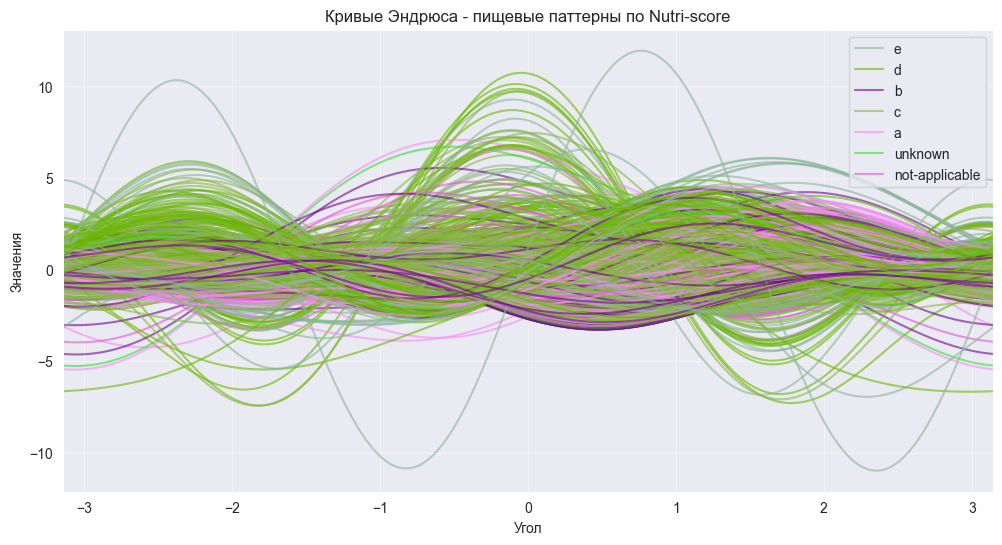

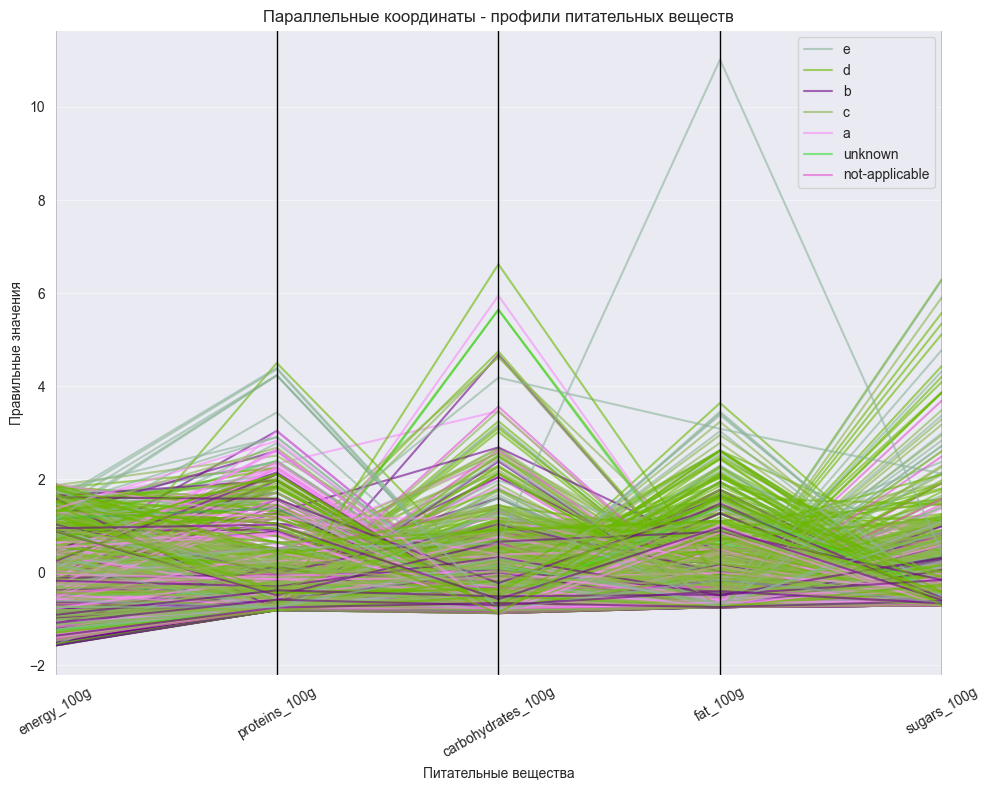

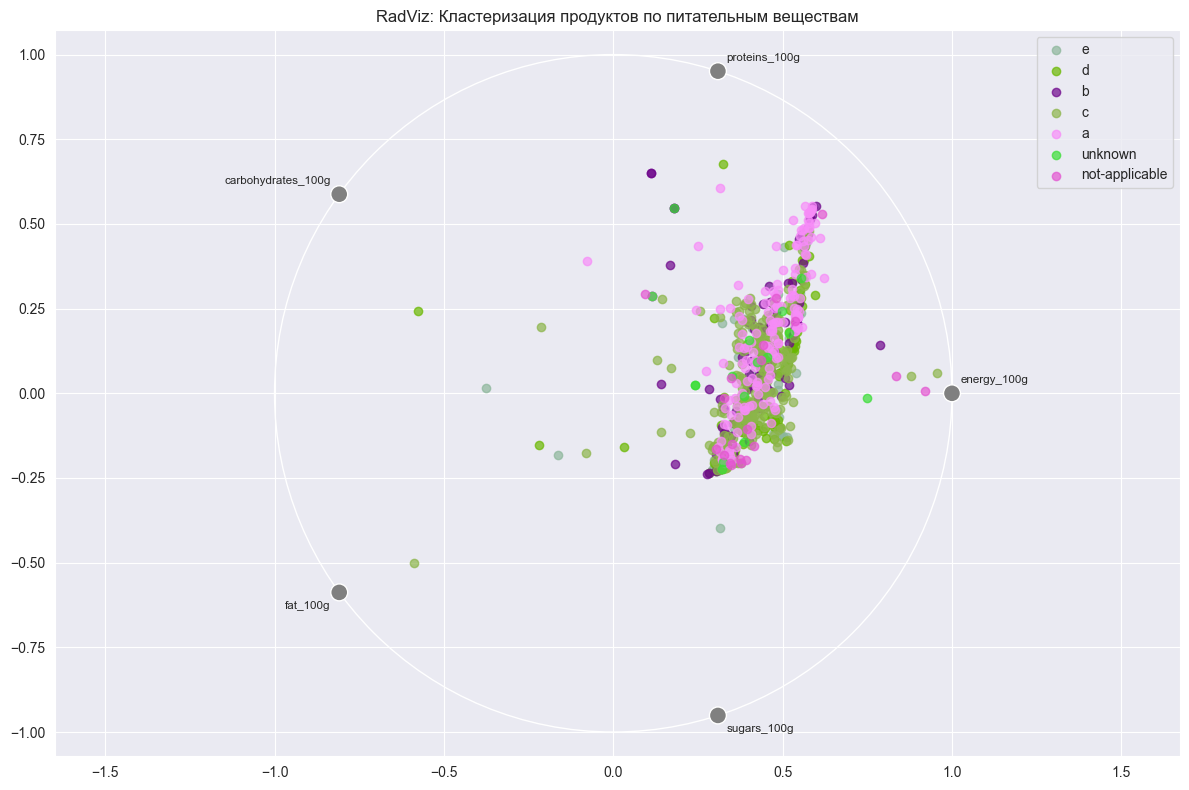



Если сравнивать эти методы, то к примеру кривые Эндрюса показывают уникальные паттерны для каждой оценки
Параллельные координаты же визуализируют полные пищевые профили
И RadViz демонстрирует кластеризацию в многомерном пространстве
Основное единое отличие то, что все методы подтверждают системные различия между Nutri-score


In [55]:
# Упражнение 4b: Продвинутые многомерные техники
# TODO: Реализуйте когда датасет загружен
from pandas.plotting import andrews_curves, parallel_coordinates, radviz
from sklearn.preprocessing import StandardScaler

# Подготовьте данные для продвинутых визуализаций
df_advanced = ["energy_100g", "proteins_100g", "carbohydrates_100g", "fat_100g", "sugars_100g", "nutriscore_grade"]
df_plot = df_clean[df_advanced].dropna()

# Выборка для производительности
df_sample = df_plot.sample(min(800, len(df_plot)), random_state=42)

scaler = StandardScaler()
numeric_cols = ["energy_100g", "proteins_100g", "carbohydrates_100g", "fat_100g", "sugars_100g"]
df_scaled = df_sample.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df_sample[numeric_cols])

# Кривые Эндрюса
plt.figure(figsize=(12, 6))
andrews_curves(df_scaled, 'nutriscore_grade', alpha=0.6)
plt.title('Кривые Эндрюса - пищевые паттерны по Nutri-score')
plt.xlabel('Угол')
plt.ylabel('Значения')
plt.grid(True, alpha=0.4)
plt.show()

# Параллельные координаты
print("\n")
plt.figure(figsize=(10, 8))
parallel_coordinates(df_scaled, 'nutriscore_grade', alpha=0.6)
plt.title('Параллельные координаты - профили питательных веществ')
plt.xlabel('Питательные вещества')
plt.ylabel('Правильные значения')
plt.xticks(rotation=30)
plt.grid(True, alpha=0.4)
plt.tight_layout()
plt.show()

# RadViz
print("\n")
plt.figure(figsize=(12, 8))
radviz(df_scaled, 'nutriscore_grade', alpha=0.7)
plt.title('RadViz: Кластеризация продуктов по питательным веществам')
plt.tight_layout()
plt.show()

print('\n')
print("Если сравнивать эти методы, то к примеру кривые Эндрюса показывают уникальные паттерны для каждой оценки")
print("Параллельные координаты же визуализируют полные пищевые профили")
print("И RadViz демонстрирует кластеризацию в многомерном пространстве")
print("Основное единое отличие то, что все методы подтверждают системные различия между Nutri-score")

## Упражнения-вызовы

Готовы к более продвинутым вызовам? Эти упражнения проверят ваше понимание и креативность!

### Вызов 1: Анализ категорий
**Задача:** Проанализируйте как пищевая ценность варьируется между различными категориями продуктов.
- Извлеките и очистите столбец `categories`
- Создайте визуализации, сравнивающие основные категории продуктов
- Найдите какие категории имеют лучшие/худшие пищевые профили

### Вызов 2: Географический анализ  
**Задача:** Исследуйте пищевые различия между странами.
- Разберите столбец `countries`  
- Сравните пищевые стандарты между различными регионами
- Определите страны с самыми здоровыми пищевыми продуктами

### Вызов 3: Собственные выводы
**Задача:** Найдите свой собственный интересный паттерн в данных.
- Выберите аспект данных, который вас интересует
- Примените множественные техники визуализации
- Представьте убедительную историю о ваших находках

### Вызов 4: Интерактивная панель
**Задача:** Создайте интерактивную визуализацию (если знаете Plotly/Bokeh).
- Разрешите фильтрацию по категории, стране или Nutri-Score
- Включите масштабирование и наведение для деталей
- Сделайте это полезным для анализа пищевой промышленности

In [ ]:
# Пространство для упражнений-вызовов
# Используйте эту ячейку и создайте дополнительные ячейки ниже для ваших решений вызовов

# Вызов 1: Пример структуры анализа категорий
# TODO: Реализуйте анализ категорий

# Пример подхода для Вызова 1:
# 1. Извлеките основные категории из столбца categories
# df_clean['main_category'] = df_clean['categories'].str.split(',').str[0]
# 
# 2. Группируйте по категориям и анализируйте средние значения питания
# category_nutrition = df_clean.groupby('main_category')[nutrition_vars].mean()
# 
# 3. Создайте визуализации
# - Тепловая карта категорий против питательных веществ
# - Коробчатые диаграммы сравнивающие категории
# - Радарные диаграммы для профилей категорий

print("💡 Советы для вызовов:")
print("1. Начните с исследования и очистки данных")
print("2. Выберите подходящую визуализацию для вашего вопроса")  
print("3. Всегда интерпретируйте ваши результаты")
print("4. Учитывайте вашу аудиторию при проектировании графиков")
print("5. Не забывайте правильно обрабатывать пропущенные данные")

## Резюме и рефлексия

### Что вы практиковали:
**Загрузка и очистка данных** - Работа с реальными грязными данными  
**Базовая визуализация** - Диаграммы рассеяния, коробчатые диаграммы, скрипичные диаграммы  
**Продвинутые техники** - Парные графики, кривые Эндрюса, параллельные координаты, RadViz  
**Статистический анализ** - KDE, анализ распределений, обнаружение выбросов  
**Многомерный анализ** - Исследование сложных взаимосвязей  

### Ключевые выводы:
1. **Реальные данные грязные** - очистка критически важна для осмысленного анализа
2. **Множественные перспективы важны** - разные графики раскрывают разные выводы  
3. **Цветовое кодирование мощно** - категориальные переменные добавляют глубину анализу
4. **Продвинутые техники** - полезны для сложных многомерных взаимосвязей
5. **Контекст имеет значение** - доменные знания помогают интерпретировать результаты

### Следующие шаги:
- Попробуйте с различными датасетами (данные ВОЗ о здоровье, экономические показатели и т.д.)
- Изучите библиотеки интерактивной визуализации (Plotly, Bokeh)
- Исследуйте статистическое тестирование наряду с визуализацией
- Практикуйте рассказывание историй с данными для презентаций

### Ресурсы для дальнейшего изучения:
- **Документация Seaborn:** https://seaborn.pydata.org/
- **Галерея Matplotlib:** https://matplotlib.org/gallery/
- **Визуализация Pandas:** https://pandas.pydata.org/docs/user_guide/visualization.html
- **Книги по визуализации данных:** "The Grammar of Graphics", "Storytelling with Data"

## Дополнительные учебные материалы

### Если вы хотите углубить знания:

**Книги:**
- "The Grammar of Graphics" - Leland Wilkinson (теоретические основы)
- "Storytelling with Data" - Cole Nussbaumer Knaflic (практические советы)
- "Data Visualization: A Practical Introduction" - Kieran Healy

**Онлайн ресурсы:**
- [Seaborn Tutorial](https://seaborn.pydata.org/tutorial.html) - официальное руководство
- [Matplotlib Gallery](https://matplotlib.org/stable/gallery/) - примеры графиков
- [Python Graph Gallery](https://python-graph-gallery.com/) - коллекция графиков с кодом

**Видео курсы:**
- Data Visualization with Python на Coursera
- Matplotlib и Seaborn на YouTube
- "Fundamentals of Data Visualization" на edX

**Практические проекты:**
- Анализ данных Kaggle competitions
- Визуализация открытых данных правительства
- Создание дашбордов для бизнес-анализа

### Следующие темы для изучения:
1. **Интерактивная визуализация:** Plotly, Bokeh, Altair
2. **Веб-дашборды:** Streamlit, Dash
3. **Географическая визуализация:** Folium, GeoPandas
4. **Статистическая визуализация:** Корреляционный анализ, регрессия
5. **Большие данные:** Datashader для работы с миллионами точек